In [0]:
!pip install git+https://github.com/fastai/fastai.git
!apt-get install unzip
!apt-get install unrar

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-6r3r2y8z
  Running command git clone -q https://github.com/fastai/fastai.git /tmp/pip-req-build-6r3r2y8z


In [0]:
from fastai.vision import *
from fastai.imports import *
from sklearn.utils import shuffle
import imageio
from fastai import basic_train

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# ************* Hier die images1000 datei entpacken!

!unzip '/content/drive/My Drive/AI/images/images1000' -d 'files'

# ************* Hier die images1000 datei entpacken!

In [0]:
plt.imshow(imageio.imread("./files/Parasitized_10.png"))
plt.show()

In [0]:
fnames = get_image_files("./files")
pat = r'/([^/]+)_\d+.png$'
bs = 64

In [0]:
data = ImageDataBunch.from_name_re("./test", fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

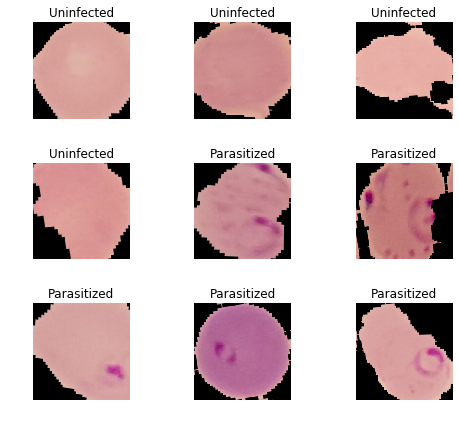

In [11]:
data.show_batch(rows=3, figsize=(7,6))


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.577940,0.162534,0.947500,00:12
1,0.401310,0.158881,0.940000,00:13
2,0.326386,0.138224,0.957500,00:14
3,0.281490,0.133817,0.952500,00:12


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


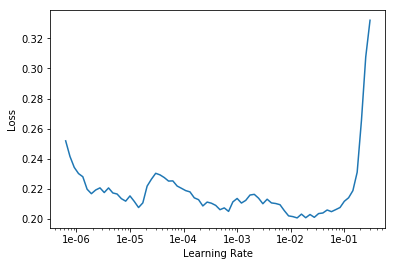

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save("stage-1")

In [0]:
learn.export()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(1e-05,  1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,0.196981,0.114140,0.967500,00:21


In [0]:
interp=ClassificationInterpretation.from_learner(learn)

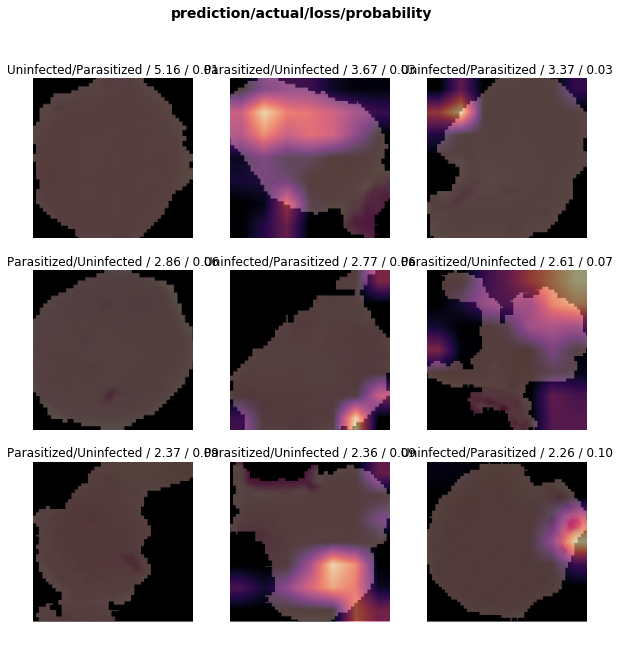

In [0]:
interp.plot_top_losses(9, figsize=(10, 10))